<a href="https://colab.research.google.com/github/harnalashok/exercises/blob/main/bank_churn_eda_pritiKumari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Priti Kumari
# Comments: Ashok K Harnal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#bch=pd.read_csv("C:\Users\91906\Desktop\FMS Python\bank_churn.csv")
#bch= pd.read_csv("churnmodelling.csv")
bch =  pd.read_csv('Churn_Modelling.csv')

In [ ]:
bch.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
bch.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
bch.drop('RowNumber', axis=1, inplace=True)
bch.head()
#dropping row number as already index is present 

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#bch.drop('Surname', axis=1, inplace=True)
bch.drop('CustomerId', axis=1, inplace=True)
bch.head()
#dropping surname and customerID as it is insignificant in EDA for bank churn

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#checking the churn probability vs credit score median
####$ Why median? Any reason?
bch.groupby('Exited')['CreditScore'].median()

Exited
0    653
1    646
Name: CreditScore, dtype: int64

650.5288

652.0

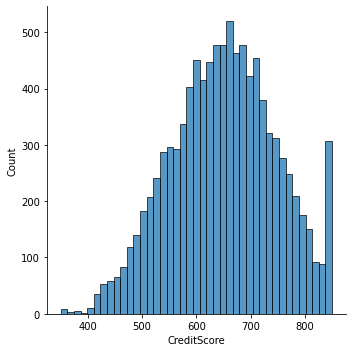

In [13]:
###$ Mean and median are not much different
###$ Use median when there are outliers
bch['CreditScore'].mean()
print()
bch['CreditScore'].median()
print()
sns.displot(data = bch, x = 'CreditScore')


In [ ]:
bch.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## If we consider 1 as exited , then 75% customers exited and only 25% retained.


In [ ]:
#considering genderwise how many exited
bch.groupby('Exited')['Gender'].value_counts()

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: Gender, dtype: int64

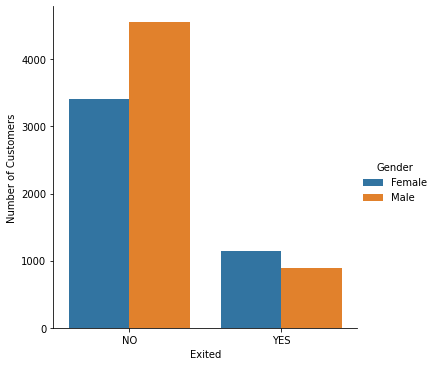

In [ ]:
sns.catplot(x = 'Exited', hue= 'Gender', data= bch, kind='count')
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers');

A countplot without a little more information may not be as useful. You can annotate with %, as below

In [16]:
# Define two general functions to annotate plots with percentages:
# See StackOverflow: https://stackoverflow.com/a/62053049

def with_hue(plot, feature, Number_of_levels, hue_levels):
    """
    Number_of_levels: No of levels in main feature
    hue_levels: No of levels in hue feature
    """
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_levels):
        total = feature.value_counts().values[i]
        for j in range(hue_levels):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_levels + i)]/total)
            x = patch[(j*Number_of_levels + i)].get_x() + patch[(j*Number_of_levels + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_levels + i)].get_y() + patch[(j*Number_of_levels + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

The following two graphs are much more informative than the above plots

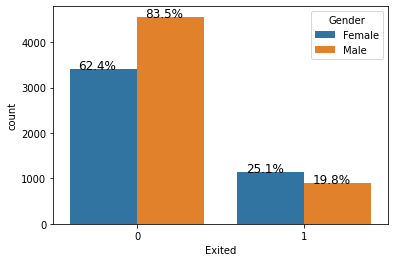

In [17]:
###$ Always prefer a barplot with errorbars to catplot without errorbars
###$ Or a countplot with %
ax = sns.countplot(x = 'Exited', hue= 'Gender', data= bch)
with_hue(ax,bch.Gender,2,2)

In [43]:
def percent_graph(grby,hue, data):
  so = data.groupby(grby)[hue].value_counts(normalize = True)
  so.name = '%count'
  t = so.reset_index()
  sns.set_theme(style="whitegrid")
  sns.barplot(x = 'Exited', y = '%count', hue= 'Gender', data= t)



<Figure size 432x576 with 0 Axes>

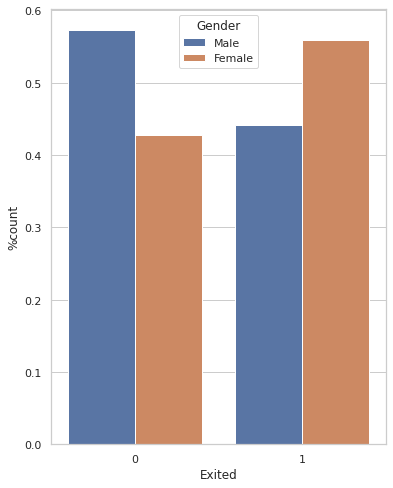

In [47]:
# Compare percentages among exited and remaining
# Among exited percentages of female are higher
# And among remaining percentages of males are higher
plt.figure(figsize=(6,8))
percent_graph('Exited', 'Gender', bch)

### more number (%) of females exited

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

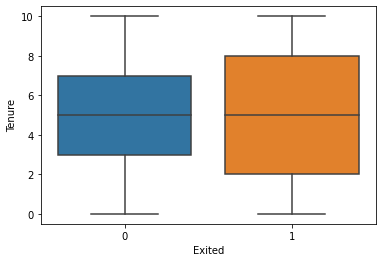

In [ ]:
sns.boxplot(x='Exited',y='Tenure',data=bch)

In [ ]:
pd.crosstab(bch.Geography,bch.Exited)

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [ ]:
pd.crosstab(bch.Tenure,bch.Exited)

Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


In [ ]:
#percentage of cust exited  wrt credit card
bch.groupby(['HasCrCard','Exited'])['Exited'].count()/bch.groupby(['HasCrCard'])['Exited'].count()

HasCrCard  Exited
0          0         0.791851
           1         0.208149
1          0         0.798157
           1         0.201843
Name: Exited, dtype: float64

In [ ]:
#percentage of cust exited in each tenure
bch.groupby(['Tenure','Exited'])['Exited'].count()/bch.groupby(['Tenure'])['Exited'].count()

Tenure  Exited
0       0         0.769976
        1         0.230024
1       0         0.775845
        1         0.224155
2       0         0.808206
        1         0.191794
3       0         0.788900
        1         0.211100
4       0         0.794742
        1         0.205258
5       0         0.793478
        1         0.206522
6       0         0.797311
        1         0.202689
7       0         0.827821
        1         0.172179
8       0         0.807805
        1         0.192195
9       0         0.783537
        1         0.216463
10      0         0.793878
        1         0.206122
Name: Exited, dtype: float64

In [ ]:
pd.crosstab(bch.Geography,bch.Exited)

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


Text(16.590885416666673, 0.5, 'Number of Customers')

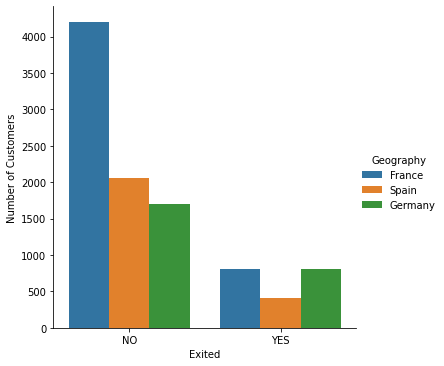

In [ ]:
sns.catplot(x = 'Exited', hue= 'Geography', data= bch, kind='count')
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers')

In [ ]:
bch['Age_cat'] = pd.cut(bch['Age'],
                    bins=[0,25,40,60,99],
                    labels=['Teen', 'Youth', 'Middle','Old'])
bch.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_cat
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Youth
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle


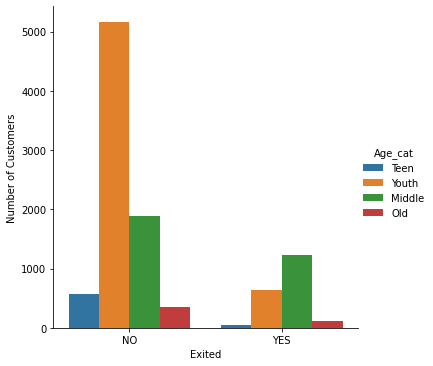

In [ ]:
sns.catplot(x = 'Exited', hue= 'Age_cat', data= bch, kind='count')
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers');

### indicates that most % of middle aged customers exit and most % of youth cust are retained


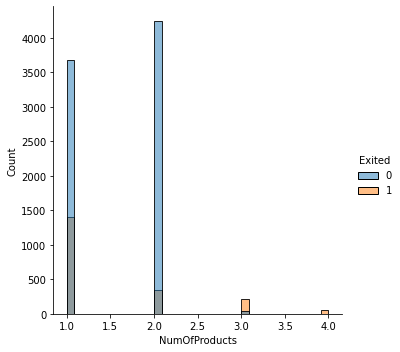

In [ ]:
###$ This plot is wrong. Both NumofProducts and Exited are discrete
#     Cannot have a displot()
sns.displot(x='NumOfProducts', hue='Exited', data=bch)

### more the no of products the cust is holding, more percentage of them are likely to exit though their count is less

In [ ]:
#binning on basis of credit score

bch['Score'] = pd.cut(bch['CreditScore'],
                    bins=[0,600,750,999],
                    labels=['Poor', 'Average', 'Good'])
bch.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_cat,Score
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle,Average
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle,Average
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle,Poor
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Youth,Average
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle,Good


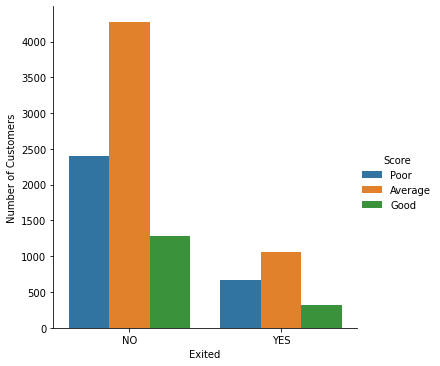

In [ ]:
sns.catplot(x = 'Exited', hue= 'Score', data= bch, kind='count')
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers');

### doesnt show any clear picture 

<AxesSubplot:xlabel='Balance', ylabel='Count'>

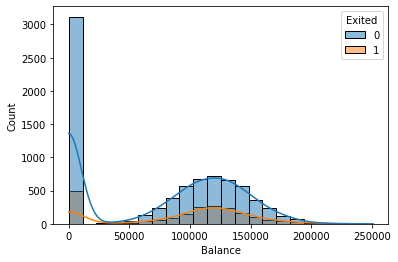

In [ ]:
#balance vs exited
sns.histplot(data=bch, x='Balance', kde=True,hue='Exited')

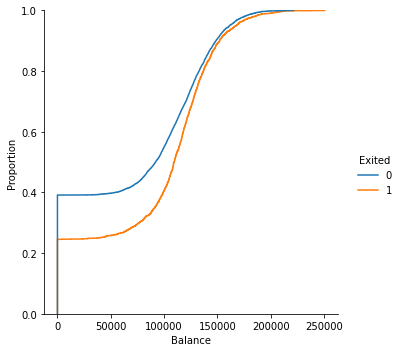

In [ ]:
#checking balance wise proportion of exited
sns.displot(data = bch, x = 'Balance', hue='Exited', kind = 'ecdf')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

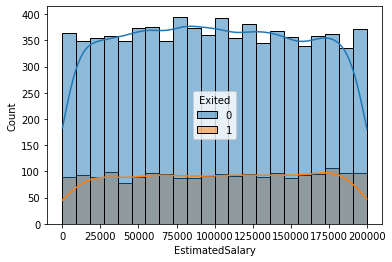

In [ ]:
#Estimatedsalary vs exited
sns.histplot(data=bch, x='EstimatedSalary', kde=True,hue='Exited')

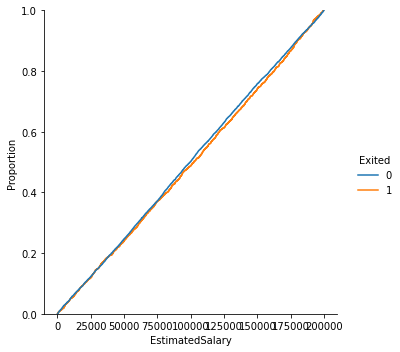

In [ ]:
sns.displot(data = bch, x = 'EstimatedSalary', hue='Exited', kind = 'ecdf')

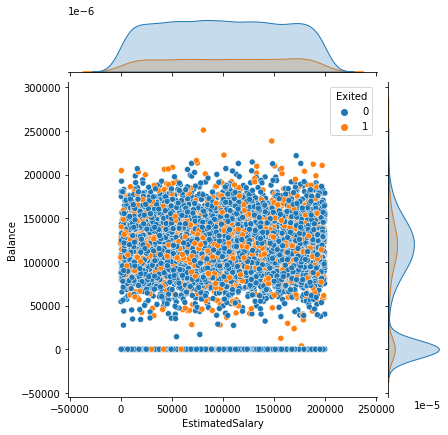

In [ ]:
#balance vs estimated salary
sns.jointplot(x='EstimatedSalary', y='Balance', data=bch, hue='Exited')

<AxesSubplot:xlabel='Age', ylabel='Count'>

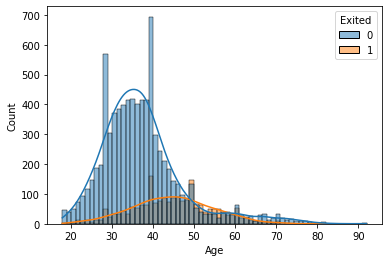

In [ ]:
#Age vs exited
sns.histplot(data=bch, x='Age', kde=True,hue='Exited')

<AxesSubplot:xlabel='Age_cat', ylabel='Count'>

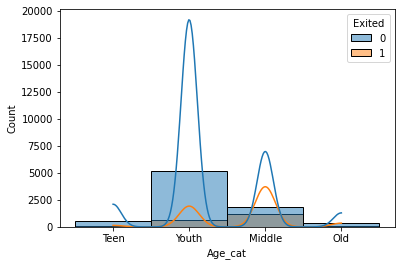

In [ ]:
###$ histgram and displot are always of continuous feature
#     Here both are discrete
sns.histplot(data=bch, x='Age_cat', kde=True,hue='Exited')

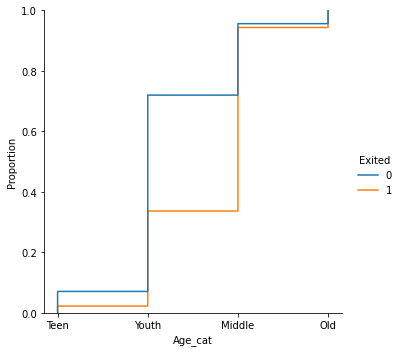

In [ ]:
sns.displot(data = bch, x = 'Age_cat', hue='Exited', kind = 'ecdf')

In [ ]:
ab=pd.crosstab( bch['Exited'], bch['Age_cat'])
ab

Age_cat,Teen,Youth,Middle,Old
Exited,,,,
0,565,5168,1881,349
1,46,640,1236,115


<AxesSubplot:xlabel='Age_cat', ylabel='Exited'>

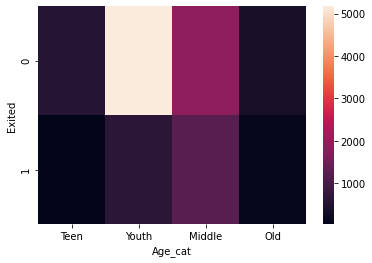

In [ ]:
sns.heatmap(data=ab,linecolor='g')

In [ ]:
#gender vs exited
g=pd.crosstab( bch['Exited'], bch['Gender'])
g

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


<AxesSubplot:xlabel='Gender', ylabel='Exited'>

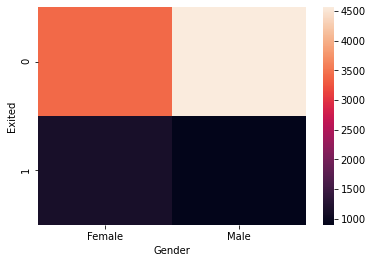

In [ ]:
sns.heatmap(data=g)

In [ ]:
#Geography vs Exited
a=pd.crosstab( bch['Exited'], bch['Geography'])
a


Geography,France,Germany,Spain
Exited,,,
0,4204,1695,2064
1,810,814,413


### almost 33% of people in Germany are likely to exit, hence max %

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

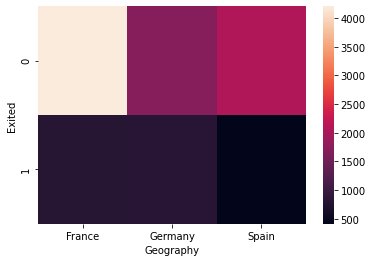

In [ ]:
sns.heatmap(data=a,linecolor='White')

<AxesSubplot:xlabel='Exited', ylabel='Age'>

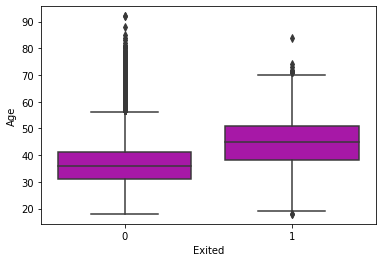

In [ ]:
sns.boxplot(x = 'Exited',       
              y = 'Age', 
              data = bch,
              color = 'm'
              )

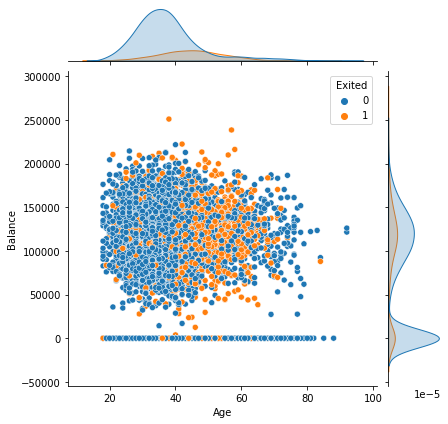

In [ ]:
#age vs balance
sns.jointplot(x='Age', y='Balance', data=bch, hue='Exited')

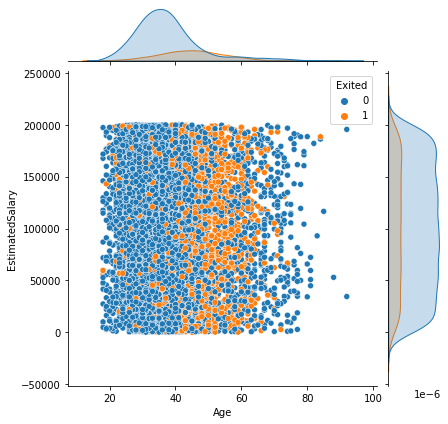

In [ ]:
#age vs Estimated salary
sns.jointplot(x='Age', y='EstimatedSalary', data=bch, hue='Exited')

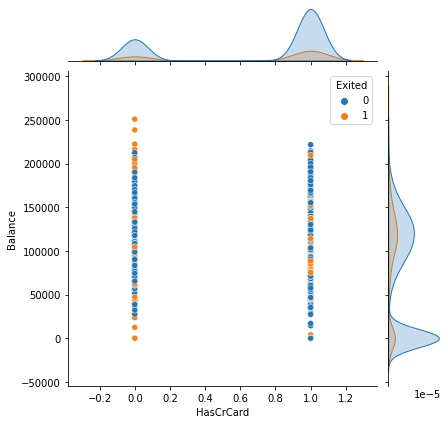

In [ ]:
###$ WRONG in jointplot both X and Y must be continuous
#    Here is one is dicrete the other continuous
#    balance vs HasCrCard
sns.jointplot(x='HasCrCard', y='Balance', data=bch, hue='Exited')

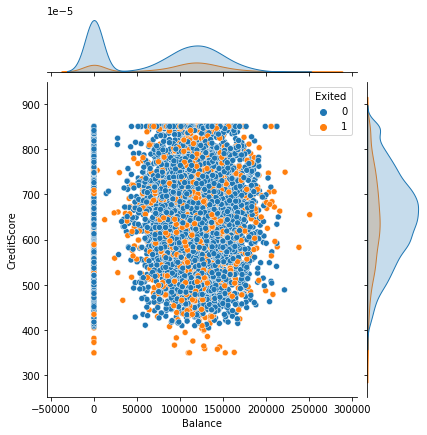

In [ ]:
#balance vs credit score
sns.jointplot(x='Balance', y='CreditScore', data=bch, hue='Exited')

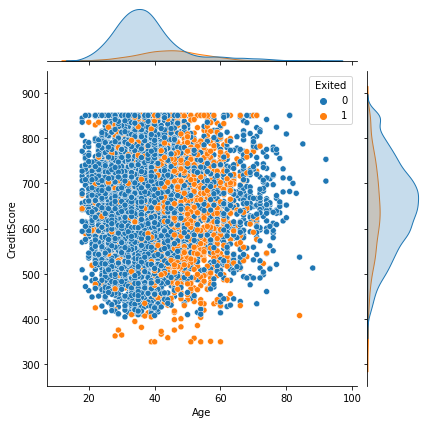

In [ ]:
#age vs credit score
sns.jointplot(x='Age', y='CreditScore', data=bch, hue='Exited')

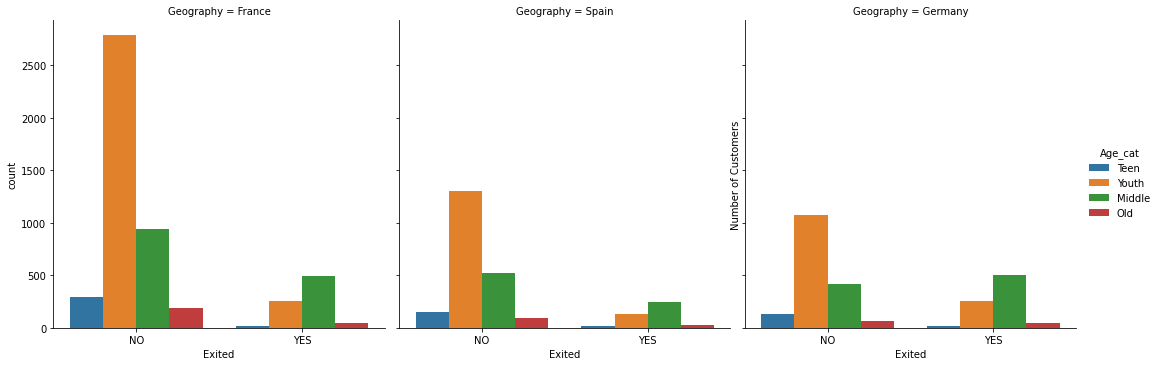

In [ ]:
#no of customers exited wrt geography and age_cat
sns.catplot(x = 'Exited', hue= 'Age_cat',col = 'Geography', data= bch, kind='count')
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers');

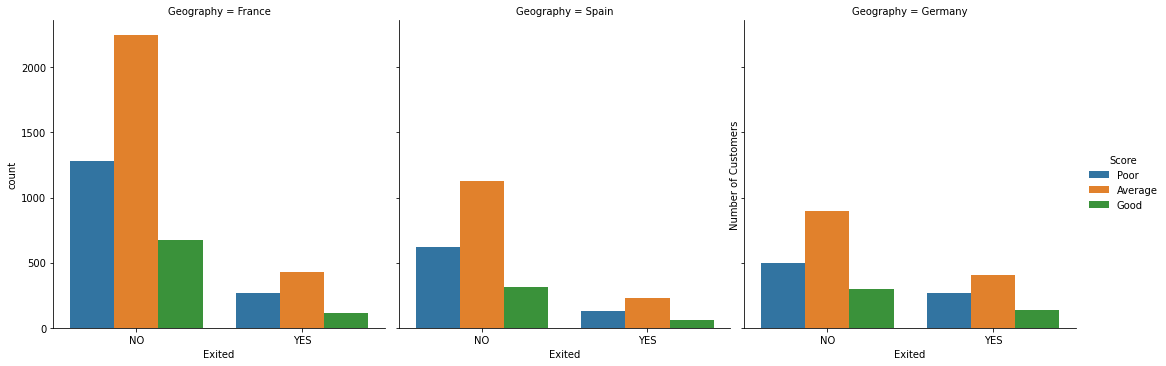

In [ ]:
#no of customers exited wrt geography and score
sns.catplot(x = 'Exited', hue= 'Score',col = 'Geography', data= bch, kind='count')
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers');

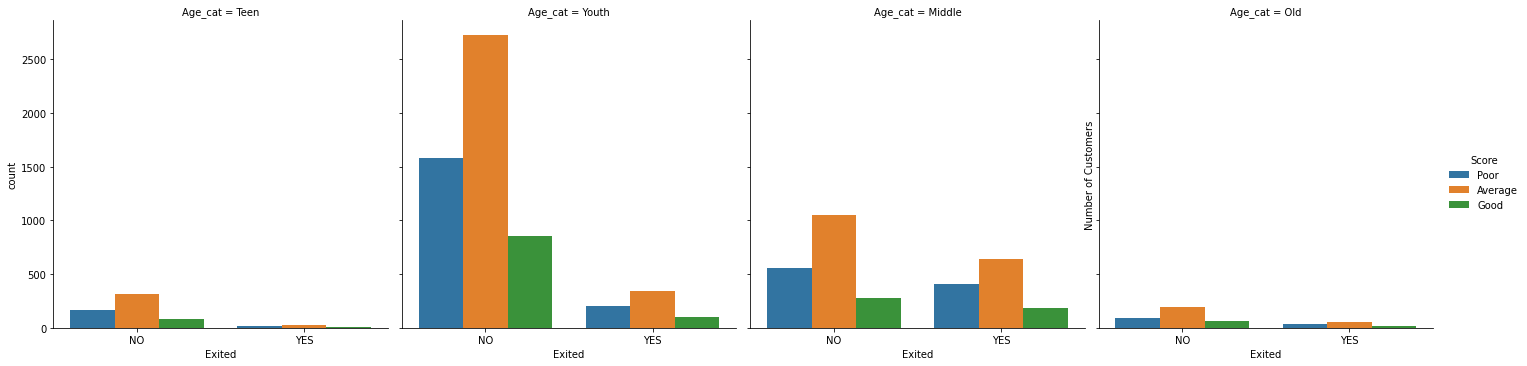

In [ ]:
#no of customers exited wrt geography and score
sns.catplot(x = 'Exited', hue= 'Score',col = 'Age_cat', data= bch, kind='count')
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers');

In [ ]:
sc=pd.crosstab(bch.Exited,bch.Score)
sc

Score,Poor,Average,Good
Exited,,,
0,2401,4277,1285
1,665,1059,313


<AxesSubplot:xlabel='Score', ylabel='Exited'>

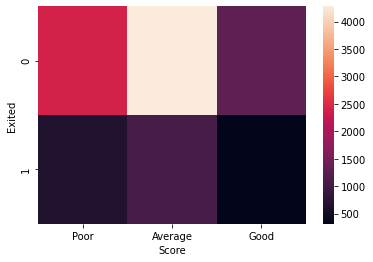

In [ ]:
sns.heatmap(data=sc)

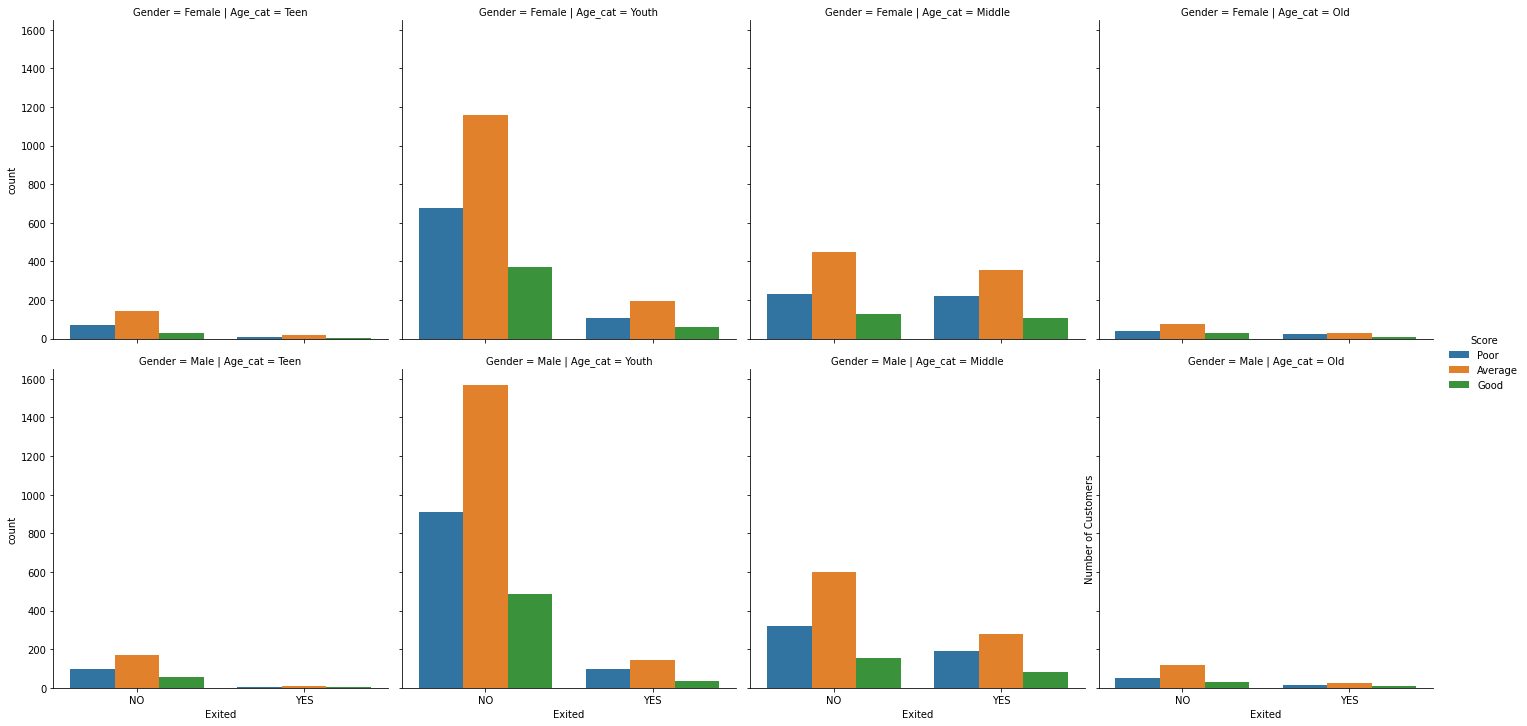

In [ ]:
sns.catplot(x = 'Exited', hue = 'Score',row= 'Gender',col = 'Age_cat', data= bch, kind='count')
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers');

In [ ]:
s=pd.crosstab(bch.Score,bch.HasCrCard)
s

HasCrCard,0,1
Score,,
Poor,905,2161
Average,1568,3768
Good,472,1126


In [ ]:
gc=pd.crosstab(bch.HasCrCard, bch.Exited)
gc

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


<AxesSubplot:xlabel='Exited', ylabel='HasCrCard'>

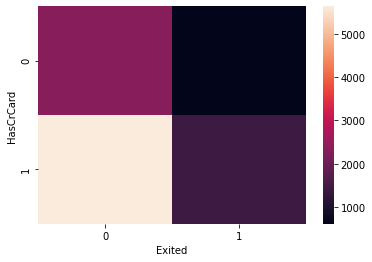

In [ ]:
sns.heatmap(data=gc)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

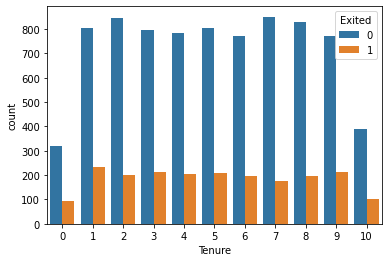

In [ ]:
#Tenure vs Exited
sns.countplot(x='Tenure', data=bch, hue='Exited')

In [ ]:
t=pd.crosstab(bch.Exited, bch.Tenure)
t

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,318,803,847,796,786,803,771,851,828,771,389
1,95,232,201,213,203,209,196,177,197,213,101


In [ ]:
t['Exited_per'] =  t.loc[1] * 100 / t.sum()
t['Notexited_per'] = t.loc[0] * 100 / t.sum()
t

Tenure,0,1,2,3,4,5,6,7,8,9,10,Exited_per,Notexited_per
Exited,,,,,,,,,,,,,
0,318,803,847,796,786,803,771,851,828,771,389,23.002421,76.997579
1,95,232,201,213,203,209,196,177,197,213,101,22.415459,77.584541


In [ ]:
t.loc[1], t.sum(), t.loc[1]*100/t.sum()

exit_1_per=t.loc[1]*100/t.sum()
exit_1_per

exit_0_per=t.loc[0]*100/t.sum()
exit_0_per

Tenure
0                76.997579
1                77.584541
2                80.820611
3                78.889990
4                79.474216
5                79.347826
6                79.731127
7                82.782101
8                80.780488
9                78.353659
10               79.387755
Exited_per       50.646180
Notexited_per    49.810145
dtype: float64

<AxesSubplot:xlabel='Tenure'>

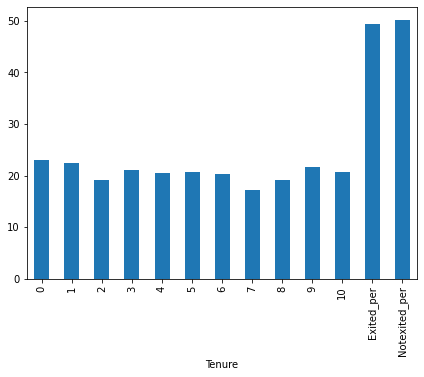

In [ ]:
exit_1_per.T.plot(kind='bar', stacked=True, figsize=(7,5))

<AxesSubplot:xlabel='Tenure'>

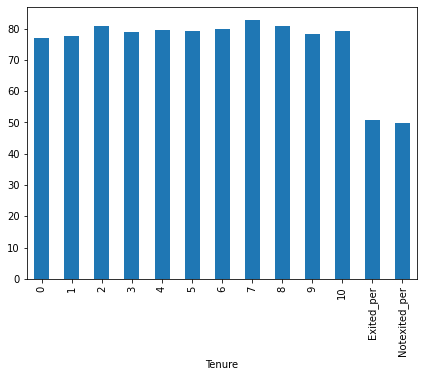

In [ ]:
exit_0_per.T.plot(kind='bar', stacked=True, figsize=(7,5))

In [ ]:
#IsActiveMember vs Exited
ac = pd.crosstab(bch.IsActiveMember, bch.Exited)
ac

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


<AxesSubplot:xlabel='Exited', ylabel='IsActiveMember'>

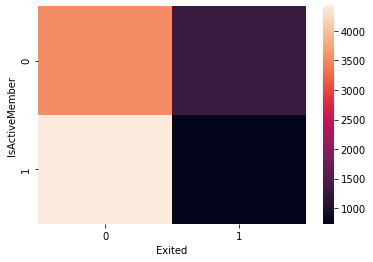

In [ ]:
sns.heatmap(data=ac)

### inactive members are likely to exit more 


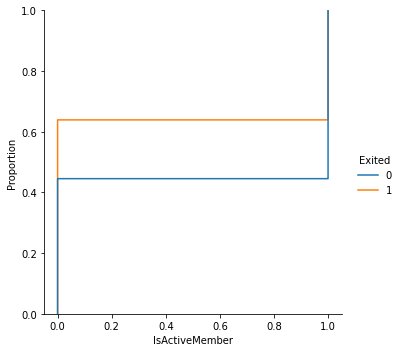

In [ ]:
sns.displot(data = bch, x = 'IsActiveMember', hue='Exited', kind = 'ecdf')

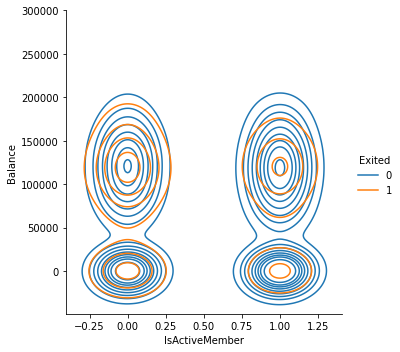

In [ ]:
sns.displot(data = bch,x='IsActiveMember', y = 'Balance', hue='Exited', kind='kde')

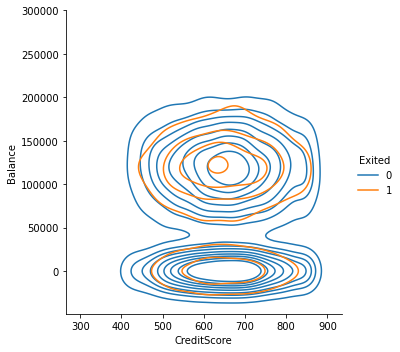

In [ ]:
sns.displot(data = bch,x='CreditScore', y = 'Balance', hue='Exited', kind='kde')

### customers with credit score 500-850 with balance between 50000 and 200000 are more likely to exit
### doesnt give any clear picture

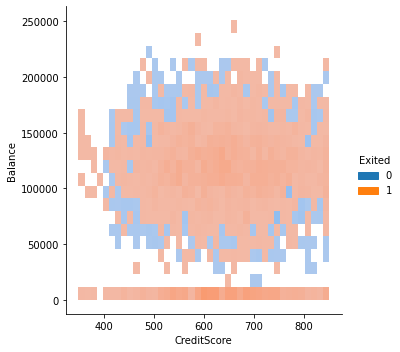

In [ ]:
sns.displot(data = bch,x='CreditScore', y = 'Balance', hue='Exited', kind='hist')

In [ ]:
bch.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_cat,Score
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle,Average
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle,Average
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle,Poor
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Youth,Average
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle,Good


In [ ]:
acs =pd.crosstab(bch.Age_cat,bch.Score)
acs

Score,Poor,Average,Good
Age_cat,,,
Teen,184,340,87
Youth,1786,3065,957
Middle,963,1685,469
Old,133,246,85


<AxesSubplot:xlabel='Score', ylabel='Age_cat'>

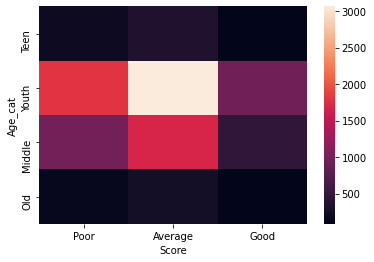

In [ ]:
sns.heatmap(data=acs)

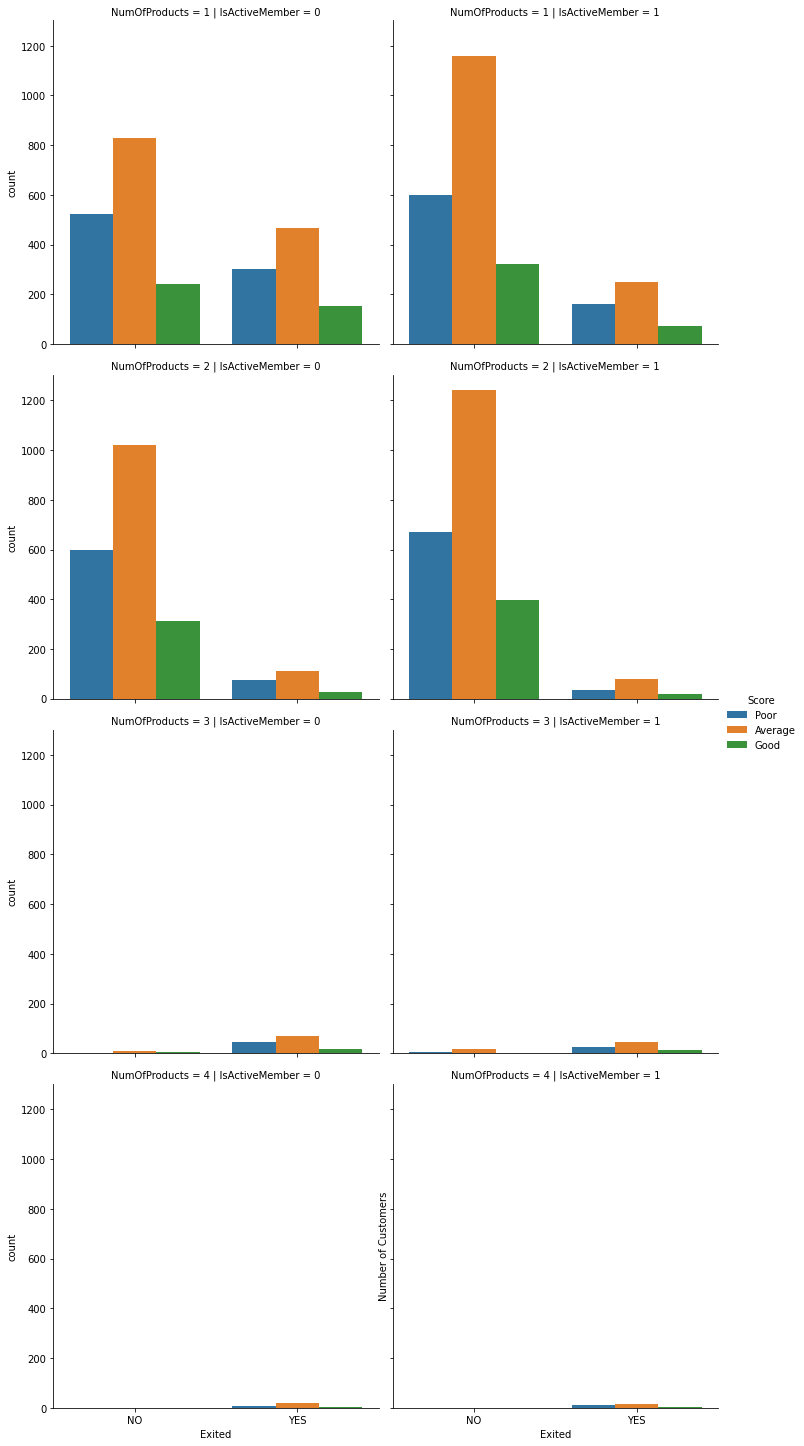

In [ ]:
sns.catplot(x = 'Exited', hue = 'Score',row= 'NumOfProducts',col = 'IsActiveMember', data=bch,kind='count')
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers');

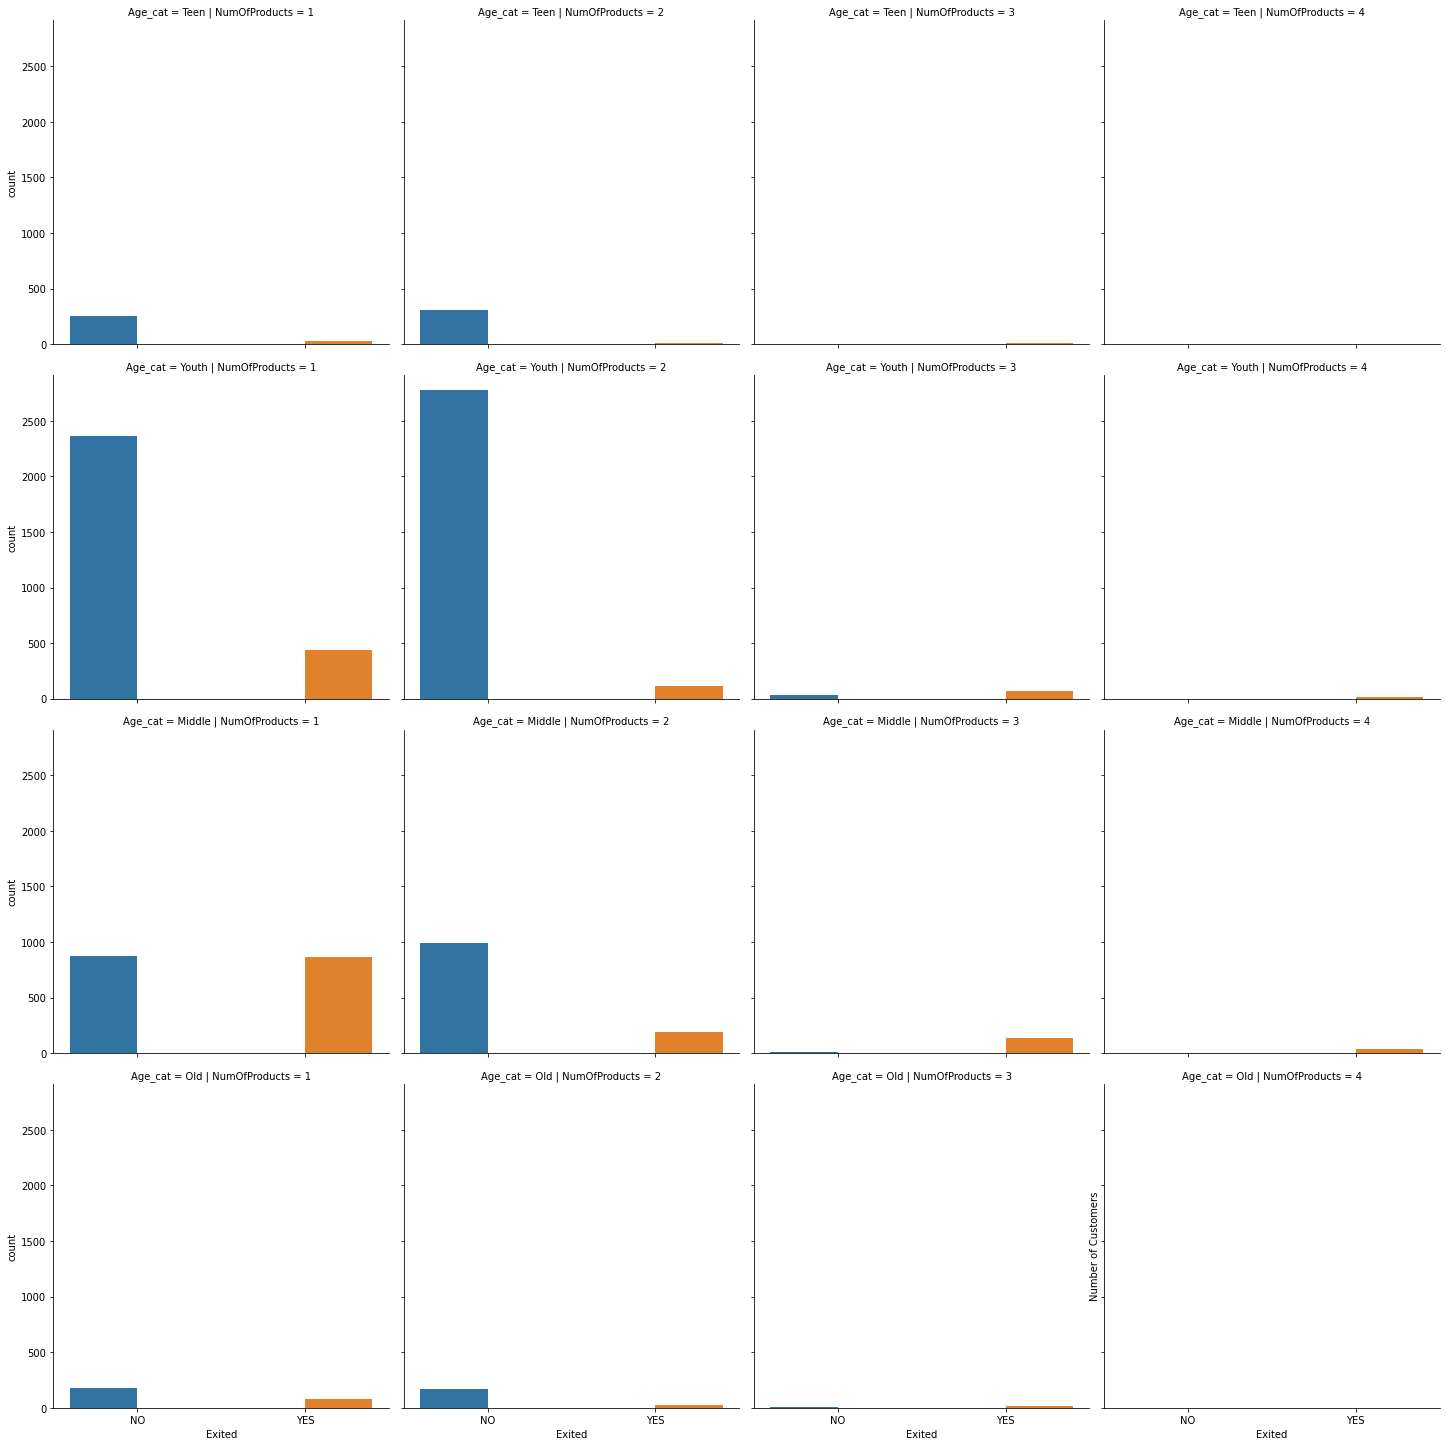

In [ ]:
sns.catplot(x = 'Exited', hue = 'Exited',row= 'Age_cat',col = 'NumOfProducts', data=bch,kind='count')
plt.xticks(range(2), ['NO', 'YES'])
plt.ylabel('Number of Customers');

In [ ]:
cat = bch.select_dtypes(include=['category']).columns.values
obj = bch.select_dtypes(include=['object']).columns.values
con = np.array([x for x in bch.select_dtypes(include=['int64','float64']).columns.values if x not in ('Age','CreditScore','Tenure','Balance','EstimatedSalary')])

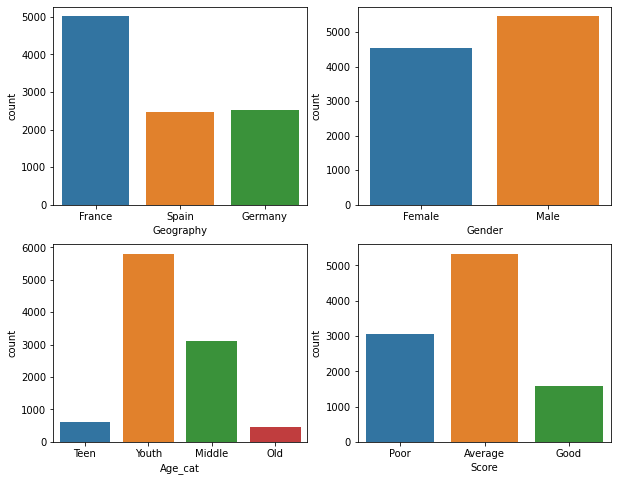

In [ ]:
p = bch.select_dtypes(include=['category','object']).columns.values
fig,ax = plt.subplots(2,2, figsize = (10,8))
ax = ax.flatten()

for i in range(len(p)):
    sns.countplot(x = bch[p[i]], data = bch,ax =ax[i] )